In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

%matplotlib inline

In [297]:
sns.set(style="whitegrid", color_codes=True)

In [2]:
list_files = os.listdir('datasets/history-scottish-witchcraft/')

In [3]:
# Put all data files into a dictionary of dataframes for easy access
def create_dfs(list_files):
    dfs_dict = {}
    for filename in list_files:
        if filename[-4:] == '.csv':
            df_name = filename[4:-4]
            dfs_dict[df_name] = pd.read_csv('datasets/history-scottish-witchcraft/{}'.format(filename))
    return dfs_dict

In [4]:
all_dfs = create_dfs(list_files)

In [5]:
all_dfs.keys()

['MovestoHLA',
 'CalendarCustom',
 'Imprisonment',
 'MentionedAsWitch',
 'RitualObject',
 'Commission',
 'ReligiousMotif',
 'DevilAppearance',
 'Appeal',
 'OtherNamedwitch',
 'ShapeChanging',
 'Complaint',
 'WitchesMeetingPlace',
 'Torture',
 'Elf_FairyElements',
 'WeatherModification',
 'Ref_Parish',
 'Trial_Person',
 'Case',
 'PropertyDamage',
 'PrevCommission',
 'DemonicPact',
 'Ordeal',
 'Person',
 'Denunciation',
 'Trial',
 'WhiteMagic',
 'MusicalInstrument',
 'Reference',
 'Source',
 'Confession',
 'CounterStrategy',
 'Malice',
 'Case_person',
 'Accused',
 'LinkedTrial',
 'Accused_family',
 'OtherCharges']

In [6]:
accused = all_dfs['Accused']

In [287]:
# Distribuition of accused witches by gender
accused_gender = accused.groupby(["Sex"]).count()["AccusedID"]
accused_gender

Sex
Female    2702
Male       468
Name: AccusedID, dtype: int64

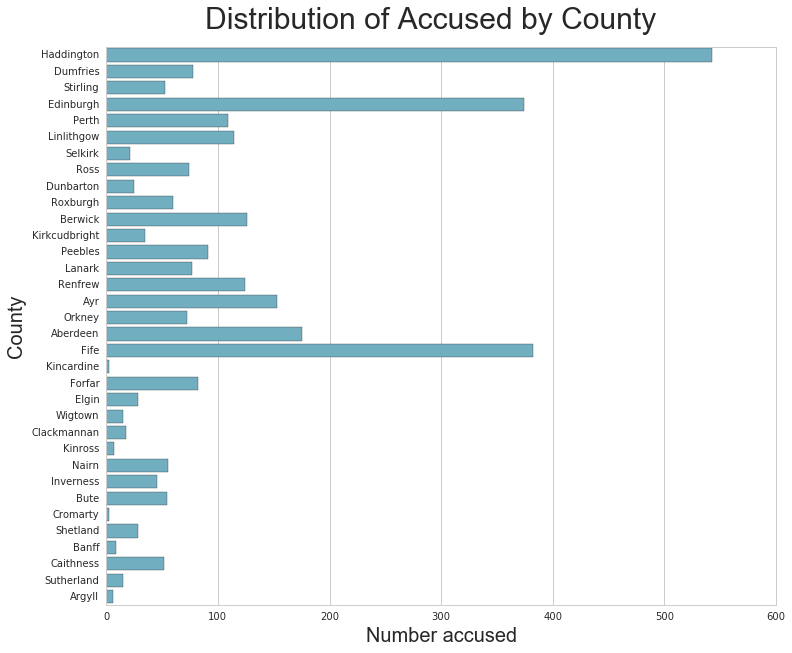

In [328]:
f, ax = plt.subplots(figsize=(12, 10))
sns.countplot(y="Res_county", data=accused, color="c")
ax.set_xlabel("Number accused", fontsize = 20)
ax.set_ylabel("County", fontsize = 20)
plt.figtext(.5,0.925,"Distribution of Accused by County",fontsize=30,ha='center')
plt.show()

In [263]:
devil_appearance = all_dfs['DevilAppearance']

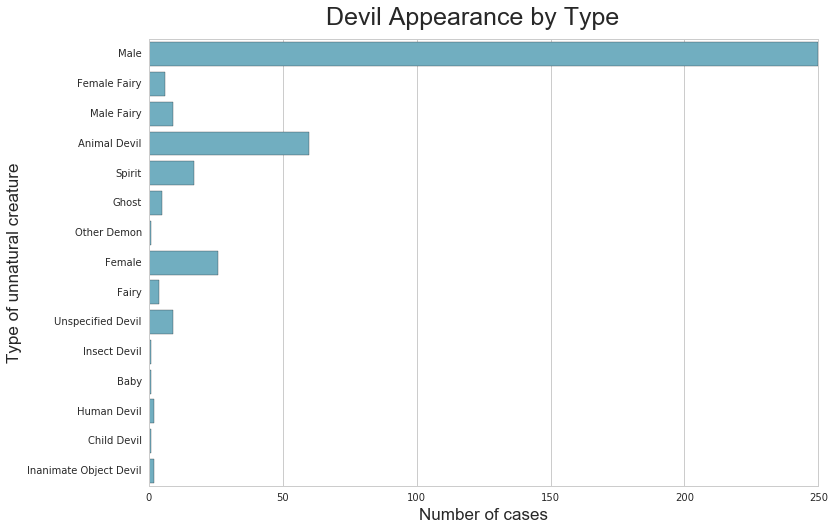

In [336]:
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y="Devil_Type", data=devil_appearance, color="c")
ax.set_xlabel("Number of cases", fontsize = 17)
ax.set_ylabel("Type of unnatural creature", fontsize = 17)
plt.figtext(.5,0.925,"Devil Appearance by Type",fontsize=25,ha='center')
plt.show()

In [208]:
def generate_cloud(text, img_path, out_file_path, background_color = "white", size = 12, add_stopwords = None):
    img_mask = np.array(Image.open(img_path))
    stopwords = STOPWORDS.update(add_stopwords)
    wc = WordCloud(background_color=background_color, max_words=3000, mask=img_mask,
                   stopwords=stopwords)
    wc.generate(text)
    # store to file
    wc.to_file(out_file_path)
    # show
    plt.figure(figsize=(size,size))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [34]:
case = all_dfs['Case']

In [340]:
add_stopwords = ["details", "also", "husband", "therefore", "modernise", 
                 "described", "said" "mentioned", "think", "recorded"]

In [178]:
accused_text = pd.DataFrame(accused['Notes'])
accused_text = accused_text.dropna()
accused_text = ' '.join([w.lower() for w in accused_text.Notes.values.flatten().tolist()])

In [220]:
case_other_charges_text = pd.DataFrame(case["OtherChargesNotes"])
case_other_charges_text = case_other_charges_text.dropna()
case_other_charges_text = " ".join([w.lower() for w in case_other_charges_text.values.flatten().tolist()])

In [231]:
case_char_text = pd.DataFrame(case["Charnotes"])
case_char_text = case_char_text.dropna()
case_char_text = " ".join([w.lower() for w in case_char_text.values.flatten().tolist()])

In [235]:
witches_text = accused_text + case_other_charges_text + case_char_text

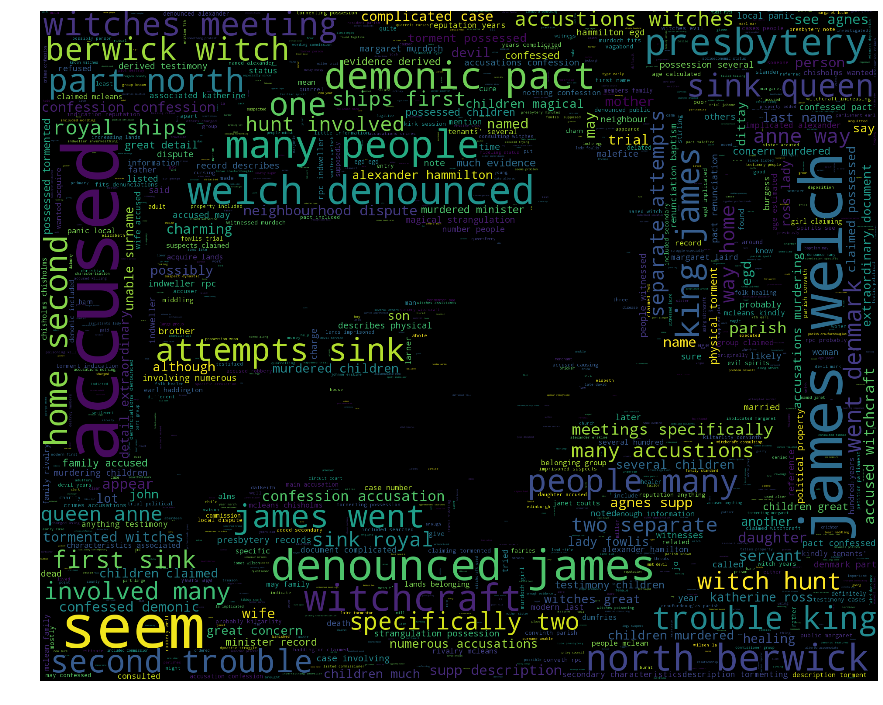

In [341]:
generate_cloud(witches_text, "images/white-witch-in-a-circle.jpg", "images/witch_cloud.png", 
               background_color= 'black', add_stopwords=add_stopwords, size = 15)

In [115]:
devil_notes = pd.DataFrame(case['DevilNotes'])
devil_notes = devil_notes.dropna()
devil_text = " ".join([w.lower() for w in devil_notes.values.flatten().tolist()])
devil_text

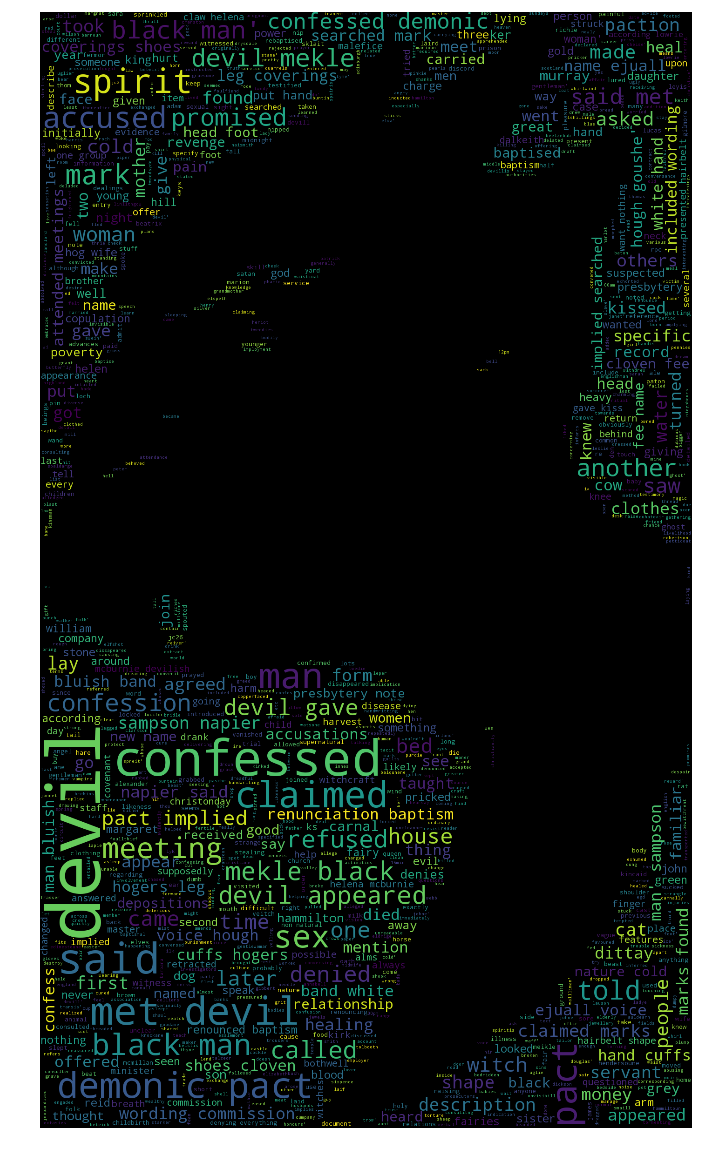

In [342]:
generate_cloud(devil_text, "images/DevilSilhouette.png", "images/devil_cloud.png", 
               background_color="black", add_stopwords=add_stopwords, size = 20)

In [143]:
# images taken from:
# http://www.publicdomainpictures.net/view-image.php?image=129258&picture=white-witch-in-a-circle
# https://openclipart.org/detail/233745/devil-silhouette